<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_114/blob/main/Proyecto_Final_Entrega2_(Reto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia y analítica de datos
# Alumnos:
# Javier Granados - A00566717
# Josías Ruiz - A00968460
# Profesor:
# María de la Paz Rico Fernández
# Entrega:
# Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans
# Fecha:
# 16/11/2022

In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 16.7 MB 36.2 MB/s 
     |████████████████████████████████| 6.3 MB 40.6 MB/s 


In [2]:
import pandas as pd
import numpy as np
import io
import requests
import urllib.request
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

pd.set_option('display.max_columns', None)

In [3]:
url1 = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_114/main/Reto1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
url2 = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_114/main/Reto1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'

In [4]:
df_sub = pd.read_csv(url1, encoding_errors='ignore', error_bad_lines=False)
df_sup = pd.read_csv(url2, encoding_errors='ignore', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


# Análisis de aguas subterráneas



# Mapeado de Indicadores de calidad

In [5]:
print(df_sub['CALIDAD_COLI_FEC'].isna().sum())
print(df_sub['CALIDAD_COLI_FEC'].unique())
df_sub['CALIDAD_COLI_FEC'].replace({
    'Potable - Excelente':10,
    'Buena calidad':1,
    'Aceptable':0,
    'Contaminada':-10,
    'Fuertemente contaminada':-20
}, inplace=True)

0
['Potable - Excelente' 'Aceptable' 'Contaminada' 'Buena calidad'
 'Fuertemente contaminada']


In [6]:
print(df_sub['CALIDAD_SDT_ra'].isna().sum())
print(df_sub['CALIDAD_SDT_ra'].unique())
df_sub['CALIDAD_SDT_ra'].fillna(df_sub['CALIDAD_SDT_ra'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_SDT_ra'].replace({
    'Excelente para riego':10,
    'Cultivos sensibles':1,
    'Cultivos con manejo especial':1,
    'Cultivos tolerantes':0,
    'Indeseable para riego':-20
}, inplace=True)

2
['Cultivos sensibles' 'Excelente para riego'
 'Cultivos con manejo especial' 'Cultivos tolerantes'
 'Indeseable para riego' nan]


In [7]:
print(df_sub['CALIDAD_SDT_salin'].isna().sum())
print(df_sub['CALIDAD_SDT_salin'].unique())
df_sub['CALIDAD_SDT_salin'].fillna(df_sub['CALIDAD_SDT_salin'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_SDT_salin'].replace({
    'Potable - Dulce':10,
    'Ligeramente salobres':0,
    'Salobres':-10,
    'Salinas':-20
}, inplace=True)

2
['Potable - Dulce' 'Ligeramente salobres' 'Salobres' 'Salinas' nan]


In [8]:
print(df_sub['CALIDAD_CR'].isna().sum())
print(df_sub['CALIDAD_CR'].unique())
df_sub['CALIDAD_CR'].replace({
    'Potable - Excelente':10,
    'No apta como FAAP':-20
}, inplace=True)

0
['Potable - Excelente' 'No apta como FAAP']


In [9]:
print(df_sub['CALIDAD_CONDUC'].isna().sum())
print(df_sub['CALIDAD_CONDUC'].unique())
df_sub['CALIDAD_CONDUC'].fillna(df_sub['CALIDAD_CONDUC'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_CONDUC'].replace({
    'Permisible para riego':0,
    'Buena para riego':1,
    'Excelente para riego':10,
    'Dudosa para riego':-10,
    'Indeseable para riego':-20
},inplace=True)

6
['Permisible para riego' 'Buena para riego' 'Dudosa para riego'
 'Indeseable para riego' nan 'Excelente para riego']


In [10]:
print(df_sub['CALIDAD_CD'].isna().sum())
print(df_sub['CALIDAD_CD'].unique())
df_sub['CALIDAD_CD'].replace({
    'Potable - Excelente':10,
    'No apta como FAAP':-20
}, inplace=True)

0
['Potable - Excelente' 'No apta como FAAP']


In [11]:
print(df_sub['CALIDAD_AS'].isna().sum())
print(df_sub['CALIDAD_AS'].unique())
df_sub['CALIDAD_AS'].replace({
    'Apta como FAAP':0,
    'No apta como FAAP':-10,
    'Potable - Excelente':10,
}, inplace=True)

0
['Apta como FAAP' 'No apta como FAAP' 'Potable - Excelente']


In [12]:
print(df_sub['CALIDAD_ALC'].isna().sum())
print(df_sub['CALIDAD_ALC'].unique())
df_sub['CALIDAD_ALC'].fillna(df_sub['CALIDAD_ALC'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_ALC'].replace({
    'Alta':10,
    'Media':0,
    'Baja':-10,
    'Indeseable como FAAP':-20,
}, inplace=True)

4
['Alta' 'Media' 'Baja' 'Indeseable como FAAP' nan]


In [13]:
print(df_sub['CALIDAD_PB'].isna().sum())
print(df_sub['CALIDAD_PB'].unique())
df_sub['CALIDAD_PB'].replace({
    'Potable - Excelente':10,
    'No apta como FAAP':-20,
}, inplace=True)

0
['Potable - Excelente' 'No apta como FAAP']


In [14]:
print(df_sub['CALIDAD_N_NO3'].isna().sum())
print(df_sub['CALIDAD_N_NO3'].unique())
df_sub['CALIDAD_N_NO3'].fillna(df_sub['CALIDAD_N_NO3'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_N_NO3'].replace({
    'Potable - Excelente':10,
    'Potable - Buena calidad':0,
    'No apta como FAAP':-20,
}, inplace=True)


1
['Potable - Excelente' 'Potable - Buena calidad' 'No apta como FAAP' nan]


In [15]:
print(df_sub['CALIDAD_MN'].isna().sum())
print(df_sub['CALIDAD_MN'].unique())
df_sub['CALIDAD_MN'].replace({
    'Potable - Excelente':10,
    'Puede afectar la salud':-20,
    'Sin efectos en la salud - Puede dar color al agua':-1,
}, inplace=True)

0
['Potable - Excelente' 'Puede afectar la salud'
 'Sin efectos en la salud - Puede dar color al agua']


In [16]:
print(df_sub['CALIDAD_HG'].isna().sum())
print(df_sub['CALIDAD_HG'].unique())
df_sub['CALIDAD_HG'].replace({
    'Potable - Excelente':10,
    'No apta como FAAP':-20,
}, inplace=True)

0
['Potable - Excelente' 'No apta como FAAP']


In [17]:
print(df_sub['CALIDAD_FLUO'].isna().sum())
print(df_sub['CALIDAD_FLUO'].unique())
df_sub['CALIDAD_FLUO'].replace({
    'Potable - Optima':10,
    'Alta':1,
    'Baja':-10,
    'Media':0,
}, inplace=True)

0
['Potable - Optima' 'Alta' 'Baja' 'Media']


In [18]:
print(df_sub['CALIDAD_FE'].isna().sum())
print(df_sub['CALIDAD_FE'].unique())
df_sub['CALIDAD_FE'].replace({
    'Potable - Excelente':10,
    'Sin efectos en la salud - Puede dar color al agua':-1,
}, inplace=True)

0
['Potable - Excelente' 'Sin efectos en la salud - Puede dar color al agua']


In [19]:
print(df_sub['CALIDAD_DUR'].isna().sum())
print(df_sub['CALIDAD_DUR'].unique())
df_sub['CALIDAD_DUR'].fillna(df_sub['CALIDAD_DUR'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_DUR'].replace({
    'Potable - Dura':0,
    'Muy dura e indeseable usos industrial y domestico':-10,
    'Potable - Suave':10,
    'Potable - Moderadamente suave':1,
}, inplace=True)

1
['Potable - Dura' 'Muy dura e indeseable usos industrial y domestico'
 'Potable - Suave' 'Potable - Moderadamente suave' nan]


In [22]:
conservarCols = ['ESTADO',
 'LATITUD',
 'LONGITUD',
 'MUNICIPIO',
 'CALIDAD_COLI_FEC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_CR',
 'CALIDAD_CONDUC',
 'CALIDAD_CD',
 'CALIDAD_AS',
 'CALIDAD_ALC',
 'CALIDAD_PB',
 'CALIDAD_N_NO3',
 'CALIDAD_MN',
 'CALIDAD_HG',
 'CALIDAD_FLUO',
 'CALIDAD_FE',
 'CALIDAD_DUR',
 'SEMAFORO',
 ]

removerCols = [x for x in df_sub.columns if x not in conservarCols]

In [27]:
#removerCols
df_sub['SEMAFORO'].replace({'Verde':1, 'Amarillo':2, 'Rojo':3}, inplace=True)

In [29]:
# Remover columnas qeu no utilizaremos
df_sub.drop(columns=removerCols, inplace=True)

In [ ]:
indicadoresCalidad = ['CALIDAD_ALC',
                      'CALIDAD_CONDUC',
                      'CALIDAD_SDT_ra',
                      'CALIDAD_SDT_salin',
                      'CALIDAD_FLUO',
                      'CALIDAD_DUR',
                      'CALIDAD_COLI_FEC',
                      'CALIDAD_N_NO3',
                      'CALIDAD_AS',
                      'CALIDAD_CD',
                      'CALIDAD_CR',
                      'CALIDAD_HG',
                      'CALIDAD_PB' ,
                      'CALIDAD_MN',
                      'CALIDAD_FE']

In [ ]:
#df_sub['SemaforoCalidad'] = df_sub[indicadoresCalidad].sum(axis=1)

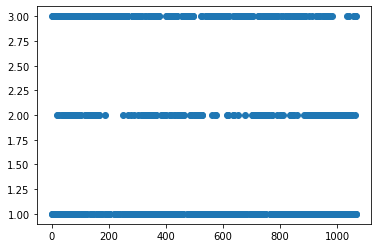

In [30]:
plt.scatter(df_sub.index, df_sub['SEMAFORO'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7b24bfaa50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7b24b80510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7b25b55190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7b24b80fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7b24b87550>],
 'means': []}

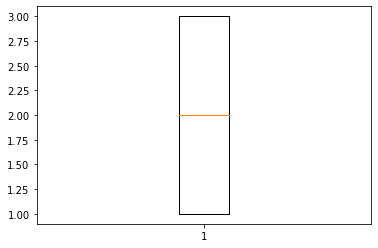

In [31]:
plt.boxplot(df_sub['SEMAFORO'])

In [32]:
df_sub['SEMAFORO'].describe()

count    1068.000000
mean        1.955993
std         0.876076
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: SEMAFORO, dtype: float64

In [ ]:
df_sub

,ESTADO,MUNICIPIO,LONGITUD,LATITUD,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE,SemaforoCalidad
0,AGUASCALIENTES,ASIENTOS,-102.02210,22.20887,10,0,1,10,10,0,10,10,0,10,10,10,10,10,10,111
1,AGUASCALIENTES,AGUASCALIENTES,-102.20075,21.99958,10,1,10,10,10,0,10,0,0,10,10,10,10,10,10,111
2,AGUASCALIENTES,COSIO,-102.28801,22.36685,10,1,10,10,1,0,10,10,-10,10,10,10,10,10,10,102
3,AGUASCALIENTES,RINCON DE ROMOS,-102.29449,22.18435,10,1,10,10,10,0,10,10,0,10,10,10,10,10,10,121
4,BAJA CALIFORNIA SUR,LA PAZ,-110.24480,23.45138,10,0,1,0,-10,0,0,-20,10,10,10,10,10,10,10,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,NUEVO LEON,LINARES,-99.54191,24.76036,10,-10,1,0,-10,-10,10,-20,10,10,10,10,10,10,10,41
1064,NUEVO LEON,LINARES,-99.70099,24.78280,10,1,10,10,-10,0,10,-20,10,10,10,10,10,10,10,81
1065,NUEVO LEON,CADEREYTA JIMENEZ,-99.82249,25.55197,10,-10,1,0,10,-10,0,-20,10,10,10,10,10,10,10,51
1066,NUEVO LEON,GALEANA,-100.32683,24.80118,10,0,1,10,10,0,10,10,10,10,10,10,10,10,10,121


In [87]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
# Split data
X = df_sub.iloc[:,2:-1]
y = df_sub.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [36]:
X

,LONGITUD,LATITUD,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE
0,-102.02210,22.20887,10,0,1,10,10,0,10,10,0,10,10,10,10,10,10
1,-102.20075,21.99958,10,1,10,10,10,0,10,0,0,10,10,10,10,10,10
2,-102.28801,22.36685,10,1,10,10,1,0,10,10,-10,10,10,10,10,10,10
3,-102.29449,22.18435,10,1,10,10,10,0,10,10,0,10,10,10,10,10,10
4,-110.24480,23.45138,10,0,1,0,-10,0,0,-20,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,10,-10,1,0,-10,-10,10,-20,10,10,10,10,10,10,10
1064,-99.70099,24.78280,10,1,10,10,-10,0,10,-20,10,10,10,10,10,10,10
1065,-99.82249,25.55197,10,-10,1,0,10,-10,0,-20,10,10,10,10,10,10,10
1066,-100.32683,24.80118,10,0,1,10,10,0,10,10,10,10,10,10,10,10,10


In [37]:
y

0       1
1       1
2       3
3       1
4       3
       ..
1063    3
1064    3
1065    3
1066    1
1067    1
Name: SEMAFORO, Length: 1068, dtype: int64

In [38]:
classifierRF = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

# Importancia de parámetros

In [39]:
featureImportances = {}
for name, score in zip(df_sub.columns[2:-1], classifierRF.feature_importances_):
  featureImportances[name] = score
  print('{0:20s} -> {1:6.3f}'.format(name, score*100))

LONGITUD             ->  3.406
LATITUD              ->  1.944
CALIDAD_ALC          ->  1.675
CALIDAD_CONDUC       ->  3.290
CALIDAD_SDT_ra       ->  1.481
CALIDAD_SDT_salin    ->  5.789
CALIDAD_FLUO         -> 18.611
CALIDAD_DUR          -> 16.091
CALIDAD_COLI_FEC     ->  7.961
CALIDAD_N_NO3        ->  9.274
CALIDAD_AS           -> 13.601
CALIDAD_CD           ->  0.003
CALIDAD_CR           ->  0.812
CALIDAD_HG           ->  0.000
CALIDAD_PB           ->  0.795
CALIDAD_MN           ->  7.214
CALIDAD_FE           ->  8.053


In [40]:
_ = pd.DataFrame(featureImportances, index=[0]).T
_

,0
LONGITUD,0.034055
LATITUD,0.019441
CALIDAD_ALC,0.016752
CALIDAD_CONDUC,0.032904
CALIDAD_SDT_ra,0.014806
CALIDAD_SDT_salin,0.057891
CALIDAD_FLUO,0.186114
CALIDAD_DUR,0.160907
CALIDAD_COLI_FEC,0.079613
CALIDAD_N_NO3,0.092743


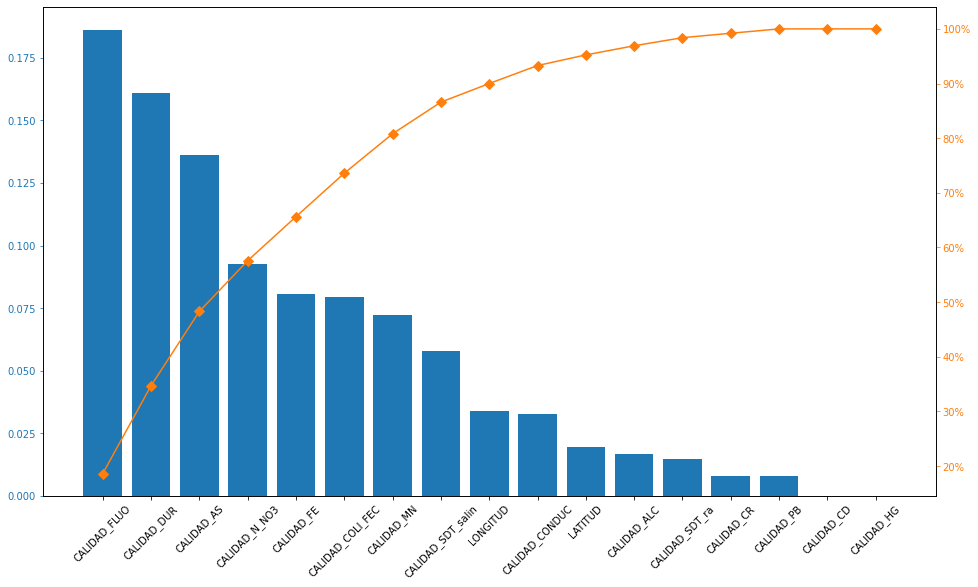

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

_.rename(columns={0:'Importancia'}, inplace=True)
_ = _.sort_values(by='Importancia',ascending=False)
_["Importancia_porcentaje"] = _["Importancia"].cumsum()/_["Importancia"].sum()*100


fig, ax = plt.subplots(figsize=(16,9))
ax.bar(_.index, _["Importancia"], color="C0")
ax2 = ax.twinx()
ax2.plot(_.index, _["Importancia_porcentaje"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.set_xticklabels(_.index, rotation = 45)
plt.show()


In [50]:
# nos quedamos sólo con 11 de 15 propiedades
mostImportantFeatures = _.index[0:11].to_list()
mostImportantFeatures

['CALIDAD_FLUO',
 'CALIDAD_DUR',
 'CALIDAD_AS',
 'CALIDAD_N_NO3',
 'CALIDAD_FE',
 'CALIDAD_COLI_FEC',
 'CALIDAD_MN',
 'CALIDAD_SDT_salin',
 'LONGITUD',
 'CALIDAD_CONDUC',
 'LATITUD']

In [51]:
# Split de información con los features más importantes
df_sub2 = df_sub[mostImportantFeatures+['SEMAFORO']]
X = df_sub2.iloc[:,:-1]
y = df_sub2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
classifierRF = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
pipeline = Pipeline(steps=[
    ('rf', classifierRF),
])
delta_train_sz = np.linspace(0.1, 1.0, num=15, endpoint=True, retstep=False, dtype=None, axis=0)
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline,    
                                                X = X_train,
                                                y = y_train,
                                                cv = kfold,
                                                train_sizes = delta_train_sz,
                                                random_state=42)


In [52]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, titulo, etiquetaX, etiquetaY):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title(titulo)
    plt.xlabel(etiquetaX)
    plt.ylabel(etiquetaY)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()


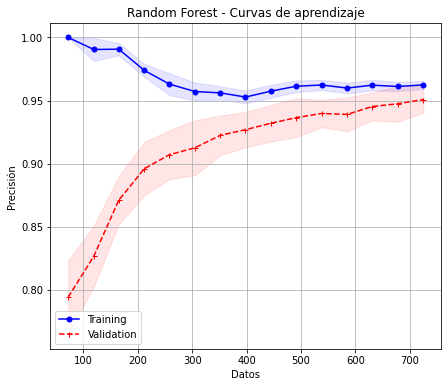

In [54]:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'Random Forest - Curvas de aprendizaje', 'Datos', 'Precisión')

In [55]:
delta_train_sz

array([0.1       , 0.16428571, 0.22857143, 0.29285714, 0.35714286,
       0.42142857, 0.48571429, 0.55      , 0.61428571, 0.67857143,
       0.74285714, 0.80714286, 0.87142857, 0.93571429, 1.        ])

In [56]:
classifierDT = DecisionTreeClassifier(max_leaf_nodes=15)
pipeline2 = Pipeline(steps=[
    ('dt', classifierDT),
])
delta_train_sz = np.linspace(0.1, 1.0, num=15, endpoint=True, retstep=False, dtype=None, axis=0)
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline2,    
                                                X = X_train,
                                                y = y_train,
                                                cv = kfold,
                                                train_sizes = delta_train_sz,
                                                random_state=42)

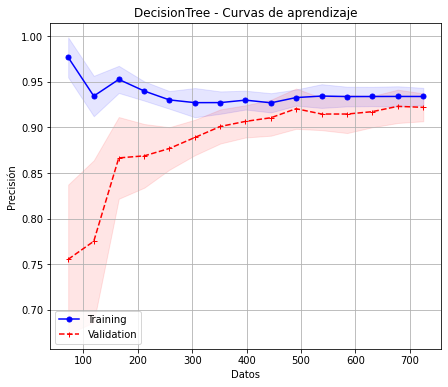

In [57]:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'DecisionTree - Curvas de aprendizaje', 'Datos', 'Precisión')

# Evaluación de Random Forest

In [77]:
classifierRF.fit(X_train, np.ravel(y_train))
y_pred = classifierRF.predict(X_test)

In [84]:
print(classification_report(np.ravel(y_test), np.ravel(y_pred)))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99        72
           2       0.83      1.00      0.91        39
           3       1.00      0.86      0.92        50

    accuracy                           0.95       161
   macro avg       0.94      0.95      0.94       161
weighted avg       0.96      0.95      0.95       161



In [142]:
# {'Verde':1, 'Amarillo':2, 'Rojo':3}
cf = confusion_matrix(y_test, y_pred)
cf

array([[71,  1,  0],
       [ 0, 39,  0],
       [ 0,  7, 43]])

El grado de exactitud está dado por la precisión y en el caso de la matriz de confusión se ayuda del métrico de sensibilidad. Para predecir las clases 1 y 3 tenemos un métrico de precisión de 100% y métricos de sensibilidad de 99% y 86%.
Esto se traduce a 8 valores de 161 que fueron clasificados incorrectamente. aún así nuestro modelo; ponderando ambos métricos en el 'f1-score', obtiene un métrico de 94%. Éste es un métrico que considera precisión y sensibilidad. 
NOTA: Ésta versión de sklearn presenta los métricos de precission y recall al revés. La matriz de confusión es clara. 

Text(0.5, 1.0, 'Matriz de confusión')

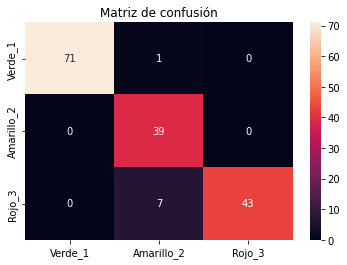

In [143]:
clases = ['Verde_1', 'Amarillo_2', 'Rojo_3']
fig, ax = plt.subplots(1,1)
sns.heatmap(cf, annot=True, ax=ax, yticklabels=clases, xticklabels=clases)
plt.title('Matriz de confusión')

# Evaluación de Decision Tree

In [144]:
classifierDT.fit(X_train, np.ravel(y_train))
y_pred = classifierDT.predict(X_test)

In [145]:
print(classification_report(np.ravel(y_test), np.ravel(y_pred)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        72
           2       0.83      1.00      0.91        39
           3       1.00      0.84      0.91        50

    accuracy                           0.95       161
   macro avg       0.94      0.95      0.94       161
weighted avg       0.96      0.95      0.95       161



In [146]:
# {'Verde':1, 'Amarillo':2, 'Rojo':3}
cf = confusion_matrix(y_test, y_pred)
cf

array([[72,  0,  0],
       [ 0, 39,  0],
       [ 0,  8, 42]])

Text(0.5, 1.0, 'Matriz de confusión')

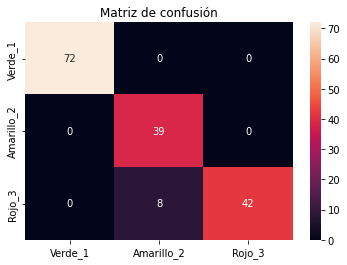

In [147]:
clases = ['Verde_1', 'Amarillo_2', 'Rojo_3']
fig, ax = plt.subplots(1,1)
sns.heatmap(cf, annot=True, ax=ax, yticklabels=clases, xticklabels=clases)
plt.title('Matriz de confusión')

# Análisis de aguas superficiales

In [148]:
indicadoresCalidadSup = ['CALIDAD_TOX_V_15',
                      'CALIDAD_TOX_D_48',
                      'CALIDAD_SST',
                      'CALIDAD_ENTEROC',
                      'CALIDAD_E_COLI',
                      'CALIDAD_DQO',
                      'CALIDAD_DBO',
                      'CALIDAD_COLI_FEC',
                      'CALIDAD_OD_PORC']

In [149]:
QtyLabels = []
for x in indicadoresCalidadSup:
    print(x)
    #print(df_sup[x].isna().sum())
    Qty=df_sup[x].unique()
    print(Qty)
    for y in Qty: 
        QtyLabels.append(y)

CALIDAD_TOX_V_15
[nan 'No Toxico' 'Toxicidad moderada' 'Toxicidad alta' 'Toxicidad baja']
CALIDAD_TOX_D_48
[nan 'No Toxico' 'Toxicidad moderada' 'Toxicidad baja' 'Toxicidad alta']
CALIDAD_SST
['Excelente' 'Buena calidad' 'Contaminada' 'Aceptable' nan
 'Fuertemente contaminada']
CALIDAD_ENTEROC
[nan 'Excelente' 'Contaminada' 'Fuertemente contaminada' 'Buena calidad']
CALIDAD_E_COLI
['Excelente' nan 'Buena calidad' 'Fuertemente contaminada' 'Contaminada'
 'Aceptable']
CALIDAD_DQO
['Contaminada' nan 'Excelente' 'Aceptable' 'Buena calidad'
 'Fuertemente contaminada']
CALIDAD_DBO
['Buena calidad' nan 'Excelente' 'Aceptable' 'Contaminada'
 'Fuertemente contaminada']
CALIDAD_COLI_FEC
['Contaminada' nan 'Buena calidad' 'Fuertemente contaminada' 'Excelente'
 'Aceptable']
CALIDAD_OD_PORC
[nan 'Excelente' 'Contaminada' 'Fuertemente contaminada' 'Aceptable'
 'Buena calidad']


In [150]:
QtyLabels=list(dict.fromkeys(QtyLabels))
QtyLabels

[nan,
 'No Toxico',
 'Toxicidad moderada',
 'Toxicidad alta',
 'Toxicidad baja',
 'Excelente',
 'Buena calidad',
 'Contaminada',
 'Aceptable',
 'Fuertemente contaminada']

In [151]:
df_sup.replace({
    'Excelente':20,
    'Buena calidad':10,
    'Aceptable':3,
    'Contaminada':-10,
    'Fuertemente contaminada':-20,
    'No Toxico':1,
    'Toxicidad baja':-2,
    'Toxicidad moderada':-10,
    'Toxicidad alta':-20,
    np.NaN:0
}, inplace=True)

In [152]:
conservarCols =indicadoresCalidadSup + ['ESTADO',
 'LATITUD',
 'LONGITUD',
 'SEMAFORO'                
]
removerCols = [x for x in df_sup.columns if x not in conservarCols]

In [153]:
# Remover columnas que no utilizaremos
df_sup.drop(columns=removerCols, inplace=True)

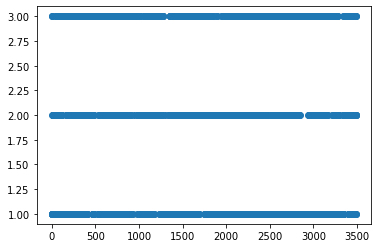

In [154]:
df_sup.replace({
    'Verde':1,
    'Amarillo':2,
    'Rojo':3
}, inplace=True)
plt.scatter(df_sup.index, df_sup['SEMAFORO'])

In [155]:
df_sup['SEMAFORO'].describe()


count    3493.000000
mean        1.949614
std         0.820194
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: SEMAFORO, dtype: float64

In [156]:
df_sup['SEMAFORO'].value_counts()

1    1267
2    1135
3    1091
Name: SEMAFORO, dtype: int64

In [157]:
df_sup

,ESTADO,LONGITUD,LATITUD,CALIDAD_DBO,CALIDAD_DQO,CALIDAD_SST,CALIDAD_COLI_FEC,CALIDAD_E_COLI,CALIDAD_ENTEROC,CALIDAD_OD_PORC,CALIDAD_TOX_D_48,CALIDAD_TOX_V_15,SEMAFORO
0,AGUASCALIENTES,-102.33911,22.24730,10,-10,20,-10,20,0,0,0,0,3
1,BAJA CALIFORNIA SUR,-109.84290,22.90473,0,0,20,0,0,20,0,0,0,1
2,BAJA CALIFORNIA SUR,-109.86442,22.89880,0,0,20,0,0,20,0,0,0,1
3,BAJA CALIFORNIA SUR,-109.88604,22.89609,0,0,20,0,0,20,0,0,0,1
4,BAJA CALIFORNIA SUR,-109.89657,22.87694,0,0,20,0,0,20,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,TAMAULIPAS,-99.42142,26.78971,20,20,3,-10,-20,0,10,1,1,2
3489,TAMAULIPAS,-99.53064,27.43714,-10,-10,10,-10,20,0,0,0,0,3
3490,TAMAULIPAS,-99.50727,27.49901,10,-10,10,3,20,0,20,1,1,3
3491,TAMAULIPAS,-99.52221,27.49631,20,3,10,-10,20,0,20,1,1,2


In [159]:
# Split data
X = df_sup.iloc[:,1:-1]
y = df_sup.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
classifierRF = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

# Importancia de parámetros

In [161]:
featureImportances = {}
for name, score in zip(df_sup.columns[1:-1], classifierRF.feature_importances_):
  featureImportances[name] = score
  print('{0:20s} -> {1:6.3f}'.format(name, score*100))

LONGITUD             ->  1.192
LATITUD              ->  1.190
CALIDAD_DBO          ->  6.803
CALIDAD_DQO          -> 39.008
CALIDAD_SST          ->  1.406
CALIDAD_COLI_FEC     -> 23.247
CALIDAD_E_COLI       ->  7.004
CALIDAD_ENTEROC      -> 13.964
CALIDAD_OD_PORC      ->  2.369
CALIDAD_TOX_D_48     ->  1.638
CALIDAD_TOX_V_15     ->  2.180


In [162]:
_ = pd.DataFrame(featureImportances, index=[0]).T
_

,0
LONGITUD,0.011924
LATITUD,0.011895
CALIDAD_DBO,0.068030
CALIDAD_DQO,0.390076
CALIDAD_SST,0.014059
CALIDAD_COLI_FEC,0.232472
CALIDAD_E_COLI,0.070039
CALIDAD_ENTEROC,0.139636
CALIDAD_OD_PORC,0.023690
CALIDAD_TOX_D_48,0.016376


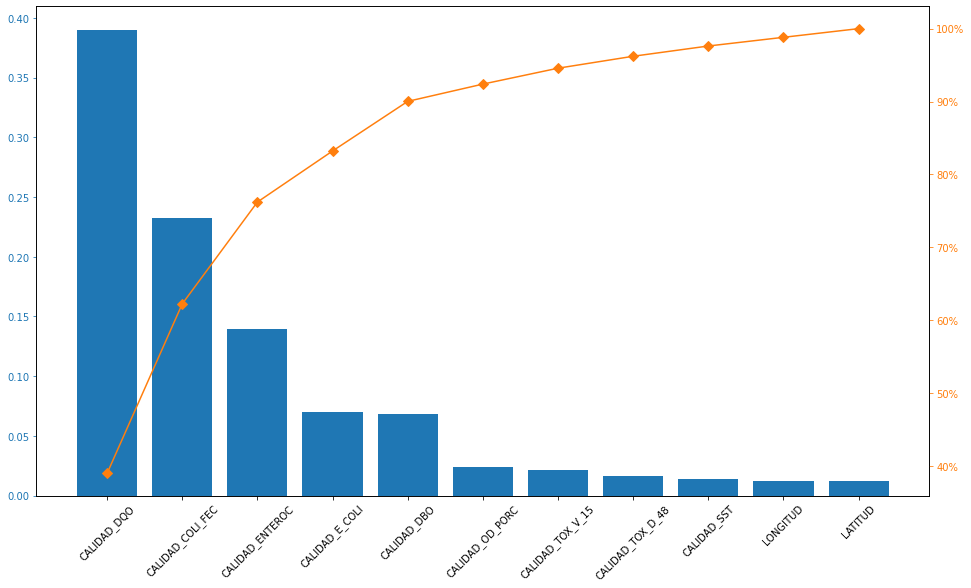

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

_.rename(columns={0:'Importancia'}, inplace=True)
_ = _.sort_values(by='Importancia',ascending=False)
_["Importancia_porcentaje"] = _["Importancia"].cumsum()/_["Importancia"].sum()*100


fig, ax = plt.subplots(figsize=(16,9))
ax.bar(_.index, _["Importancia"], color="C0")
ax2 = ax.twinx()
ax2.plot(_.index, _["Importancia_porcentaje"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.set_xticklabels(_.index, rotation = 45)
plt.show()

In [164]:
_

,Importancia,Importancia_porcentaje
CALIDAD_DQO,0.390076,39.007585
CALIDAD_COLI_FEC,0.232472,62.254762
CALIDAD_ENTEROC,0.139636,76.218317
CALIDAD_E_COLI,0.070039,83.222221
CALIDAD_DBO,0.068030,90.025192
CALIDAD_OD_PORC,0.023690,92.394227
CALIDAD_TOX_V_15,0.021804,94.574603
CALIDAD_TOX_D_48,0.016376,96.212169
CALIDAD_SST,0.014059,97.618103
LONGITUD,0.011924,98.810498


In [165]:
# nos quedamos sólo con los que representen 95%
mostImportantFeatures = []
for i in range(len(_)):
    vrow=_.iloc[i]['Importancia_porcentaje']
    if vrow<95: 
        mostImportantFeatures.append(_.iloc[i].name)
mostImportantFeatures

['CALIDAD_DQO',
 'CALIDAD_COLI_FEC',
 'CALIDAD_ENTEROC',
 'CALIDAD_E_COLI',
 'CALIDAD_DBO',
 'CALIDAD_OD_PORC',
 'CALIDAD_TOX_V_15']

In [167]:
# Split de información con los features más importantes
df_sub2 = df_sup[mostImportantFeatures+['SEMAFORO']]
X = df_sub2.iloc[:,:-1]
y = df_sub2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

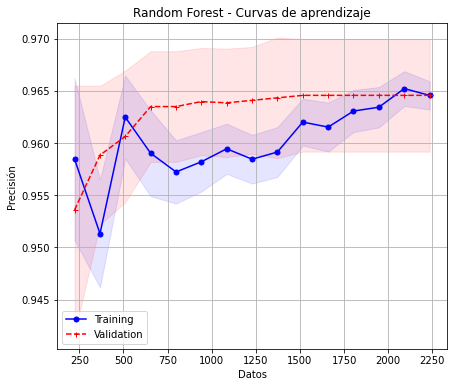

In [170]:
#Model Random Forest
pipeline = Pipeline(steps=[('rf', classifierRF)])
delta_train_sz = np.linspace(0.1, 1.0, num=15, endpoint=True, retstep=False, dtype=None, axis=0)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline,    
                                                X = X_train,
                                                y = y_train,
                                                cv = kfold,
                                                train_sizes = delta_train_sz,
                                                random_state=42)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'Random Forest - Curvas de aprendizaje', 'Datos', 'Precisión')

# Evaluación de Random Forest

In [171]:
classifierRF.fit(X_train, np.ravel(y_train))
y_pred = classifierRF.predict(X_test)

In [185]:
print(classification_report(np.ravel(y_test), np.ravel(y_pred), target_names=['Verde_1', 'Amarillo_2', 'Rojo_3']))

              precision    recall  f1-score   support

     Verde_1       0.93      1.00      0.96       239
  Amarillo_2       0.99      0.93      0.96       237
      Rojo_3       1.00      0.99      0.99       223

    accuracy                           0.97       699
   macro avg       0.97      0.97      0.97       699
weighted avg       0.97      0.97      0.97       699



In [173]:
# {'Verde':1, 'Amarillo':2, 'Rojo':3}
cf = confusion_matrix(y_test, y_pred)
cf

array([[239,   0,   0],
       [ 17, 220,   0],
       [  1,   2, 220]])

Text(0.5, 1.0, 'Matriz de confusión')

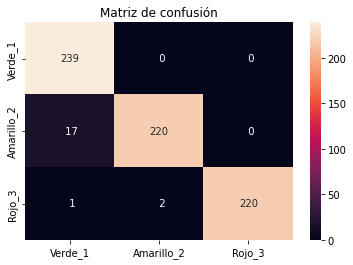

In [176]:
clases = ['Verde_1', 'Amarillo_2', 'Rojo_3']
fig, ax = plt.subplots(1,1)
sns.heatmap(cf, annot=True, ax=ax, yticklabels=clases, xticklabels=clases, fmt='3d')
plt.title('Matriz de confusión')

El grado de exactitud está dado por la precisión y en el caso de la matriz de confusión se ayuda del métrico de sensibilidad. Para predecir la clase 1 tenemos un métrico de precisión de 100% y métrico de sensibilidad de 93%.
Esto se traduce a 18 valores de otras clases que fueron clasificados incorrectamente como clase 1. Aún así nuestro modelo; ponderando ambos métricos en el 'f1-score', obtiene un métrico de 97%. Éste es un métrico que considera precisión y sensibilidad.
NOTA: Ésta versión de sklearn presenta los métricos de precission y recall al revés. La matriz de confusión es clara.

# Evaluación de Decision Tree

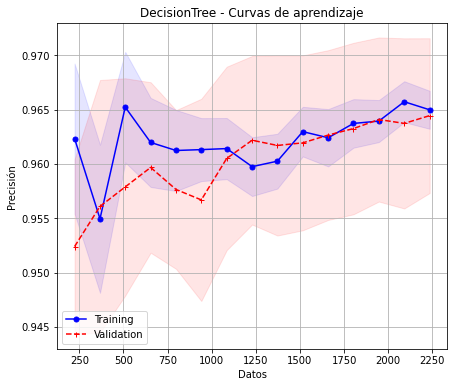

In [186]:
#Model Decision Tree

classifierDT = DecisionTreeClassifier(max_leaf_nodes=16)
pipeline2 = Pipeline(steps=[('dt', classifierDT)])

delta_train_sz = np.linspace(0.1, 1.0, num=15, endpoint=True, retstep=False, dtype=None, axis=0)
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline2,    
                                                X = X_train,
                                                y = y_train,
                                                cv = kfold,
                                                train_sizes = delta_train_sz,
                                                random_state=42)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'DecisionTree - Curvas de aprendizaje', 'Datos', 'Precisión')

In [187]:
classifierDT.fit(X_train, np.ravel(y_train))
y_pred = classifierDT.predict(X_test)

In [188]:
print(classification_report(np.ravel(y_test), np.ravel(y_pred), target_names=['Verde_1', 'Amarillo_2', 'Rojo_3']))

              precision    recall  f1-score   support

     Verde_1       0.93      1.00      0.96       239
  Amarillo_2       1.00      0.93      0.96       237
      Rojo_3       1.00      0.99      1.00       223

    accuracy                           0.97       699
   macro avg       0.98      0.97      0.97       699
weighted avg       0.97      0.97      0.97       699



In [189]:
# {'Verde':1, 'Amarillo':2, 'Rojo':3}
cf = confusion_matrix(y_test, y_pred)
cf

array([[239,   0,   0],
       [ 17, 220,   0],
       [  1,   1, 221]])

Text(0.5, 1.0, 'Matriz de confusión')

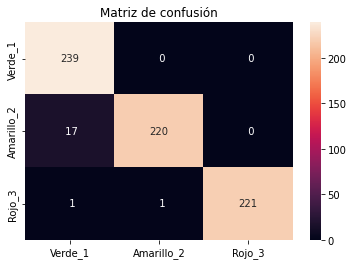

In [190]:
clases = ['Verde_1', 'Amarillo_2', 'Rojo_3']
fig, ax = plt.subplots(1,1)
sns.heatmap(cf, annot=True, ax=ax, yticklabels=clases, xticklabels=clases, fmt='3d')
plt.title('Matriz de confusión')

Basandonos en los métricos de desempeño. Es mejor el modelo de decision tree gracias a su score de sensibilidad. La clasificación correcta de un sólo dato hace la diferencia con respecto al modelo de Random Forest. Haciéndo énfasis en que éste modelo es menos costoso.